<h1>Linear Regression tests with emcee</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chain_analysis import contour_plot, gelman_rubin
import emcee

plt.rcParams['figure.figsize']=(7,6)
plt.style.use('seaborn-whitegrid')

<h2>I. Y = mX</h2>

m = 0.7893211646311447


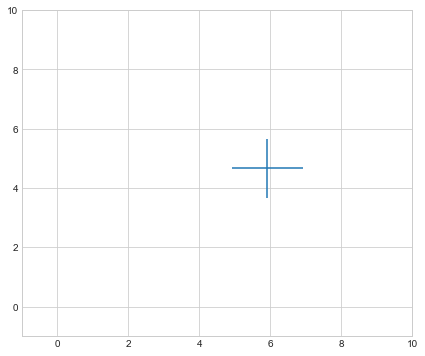

In [2]:
# generating a random single point and "m"
x = 2.0*np.random.rand()+5.0
m = np.random.rand()
y = m*x

print('m = {}'.format(m))
_=plt.errorbar(x,y,xerr=np.ones_like(x),yerr=np.ones_like(y),ls='')
_=plt.xlim(-1.0,10.0)
_=plt.ylim(-1.0,10.0)

<h3>I.a. Considering error along y-axis only</h3>

In [3]:
### Log Likelihood ###

def lnlkl(p, x, y):
    y_model = p*x
    return -0.5 * (np.power(y-y_model,2) + np.log(2*np.pi))

In [4]:
### Log Prior ###
# Using flat priors for m (just to bound the posterior)

def lnprior_m(m):
    if -5.0 < m < 5.0:
        return 0.0
    return -np.inf

In [5]:
### Log Probability ###

def lnprob(p, x, y):
    lpm = lnprior_m(p)
    if not np.isfinite(lpm):
        return -np.inf
    return lpm + lnlkl(p, x, y)

In [6]:
### Ensemble Method ###
n_walker=50
n_steps=2000
ndim=1

# Wakers initial positions
pos0 = np.c_[np.random.rand(n_walker)-0.5]

sampler_Ey = emcee.EnsembleSampler(n_walker, ndim, lnprob,args=(x,y))
pos,_,_=sampler_Ey.run_mcmc(pos0 = pos0 , N=100)
sampler_Ey.reset()
_=sampler_Ey.run_mcmc(pos0 = pos , N=n_steps)

(-0.4106788353688553, 1.9893211646311446)

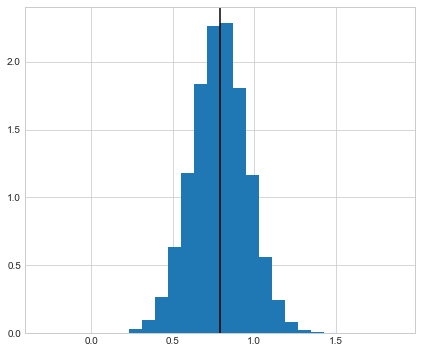

In [7]:
_=plt.hist(sampler_Ey.chain[:,:,:].ravel(),bins=np.linspace(m-1.2,m+1.2,31),histtype='stepfilled',normed=True)
plt.axvline(m,color='k')
plt.xlim(m-1.2,m+1.2)

<h3>Considering errors along both axis</h3>

In [8]:
### Log Likelihood ###

def lnlkl(p, x, y):
    y_model = p*x
    return -0.5 * (np.divide(np.power(y-y_model,2), (1+p**2)) + np.log(2*np.pi*(1+p**2)))

def lnprob(p, x, y):
    lpm = lnprior_m(p)
    if not np.isfinite(lpm):
        return -np.inf
    return lnlkl(p, x, y)

In [9]:
### Ensemble Method ###
n_walker=50
n_steps=2000
ndim=1

# Wakers initial positions
pos0 = np.c_[np.random.rand(n_walker)-0.5]

sampler_Exy = emcee.EnsembleSampler(n_walker, ndim, lnprob, args=(x,y))
pos,_,_=sampler_Exy.run_mcmc(pos0 = pos0 , N=100)
sampler_Exy.reset()
_=sampler_Exy.run_mcmc(pos0 = pos , N=n_steps)

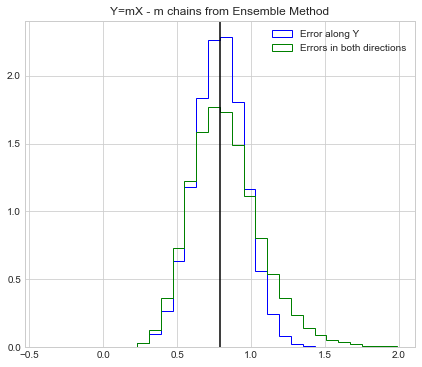

In [10]:
_=plt.hist(sampler_Ey.chain[:,:,:].ravel(),bins=np.linspace(m-1.2,m+1.2,31),histtype='step',color='b',normed=True)
_=plt.hist(sampler_Exy.chain[:,:,:].ravel(),bins=np.linspace(m-1.2,m+1.2,31),histtype='step',color='g',normed=True)
plt.legend(('Error along Y','Errors in both directions'))
plt.axvline(m,color='k')
plt.title('Y=mX - m chains from Ensemble Method')
#plt.savefig('ymx_emcee_test.png')

<h2>II. Y = mX+p</h2>

m = 0.7692827418070343 and p = 0.2124274727191977


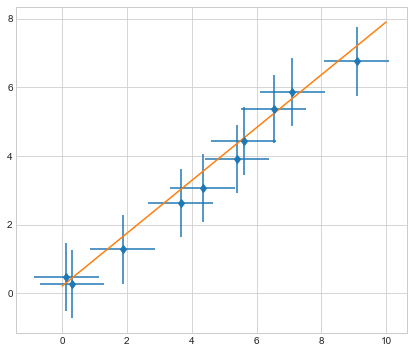

In [12]:
# generating easy data
x = np.arange(10) + 2.0*(np.random.rand(10)-0.5)
m = 2.0*(np.random.rand()-0.5)
p = 2.0*(np.random.rand()-0.5)
y = m*x + p + (np.random.rand(10)-0.5)

print('m = {} and p = {}'.format(m,p))
_=plt.errorbar(x,y,xerr=np.ones_like(x),yerr=np.ones_like(y),marker='d',ls='')
plt.plot(np.arange(11),m*np.arange(11)+p)

<h3>II.a. Considering error along y-axis only</h3>

In [13]:
### Log Likelihood ###

def lnlkl(p, x, y):
    y_model = p[0]*x + p[1]
    return -0.5 * np.nansum(np.power(y-y_model,2) + np.log(2*np.pi))

In [14]:
### Log Prior ###
# Using flat priors for m (just to bound the posterior)

def lnprior_m(m):
    if -5.0 < m < 5.0:
        return 0.0
    return -np.inf

def lnprior_p(p):
    if -5.0 < p < 5.0:
        return 0.0
    return -np.inf

In [15]:
### Log Probability ###

def lnprob(p, x, y):
    lpm = lnprior_m(p[0])
    lpp = lnprior_p(p[1])
    if not np.isfinite(lpm) or not np.isfinite(lpp):
        return -np.inf
    return lpm + lpp + lnlkl(p, x, y)

In [16]:
### Ensemble Method ###
n_walker=50
n_steps=2000
ndim=2

# Wakers initial positions
pos0 = np.c_[np.random.rand(n_walker)-0.5,np.random.rand(n_walker)-0.5]

sampler_Ey = emcee.EnsembleSampler(n_walker, ndim, lnprob, args=(x,y))
pos,_,_=sampler_Ey.run_mcmc(pos0 = pos0 , N=100)
sampler_Ey.reset()
_=sampler_Ey.run_mcmc(pos0 = pos , N=n_steps)

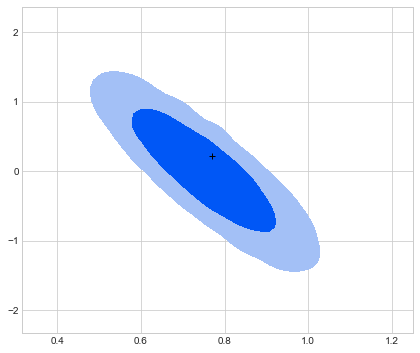

In [17]:
contour_plot.contour(sampler_Ey.chain[:,:,:].reshape([50*2000,2]), [0,1], smooth=2e5)
plt.plot(m,p,'+k')

<h3>II.b. Considering errors along both axis</h3>

In [18]:
### Log Likelihood ###

def lnlkl(p, x, y):
    y_model = p[0]*x + p[1]
    return -0.5 * np.nansum(np.divide(np.power(y-y_model,2), (1+p[0]**2)) + np.log(2*np.pi*(1+p[0]**2)))

def lnprob(p, x, y):
    lpm = lnprior_m(p[0])
    lpp = lnprior_p(p[1])
    if not np.isfinite(lpm) or not np.isfinite(lpp):
        return -np.inf
    return lpm + lpp + lnlkl(p, x, y)

In [19]:
### Ensemble Method ###
n_walker=50
n_steps=2000
ndim=2

# Wakers initial positions
pos0 = np.c_[np.random.rand(n_walker)-0.5,np.random.rand(n_walker)-0.5]

sampler_Exy = emcee.EnsembleSampler(n_walker, ndim, lnprob, args=(x,y))
pos,_,_=sampler_Exy.run_mcmc(pos0 = pos0 , N=100)
sampler_Exy.reset()
_=sampler_Exy.run_mcmc(pos0 = pos , N=n_steps)

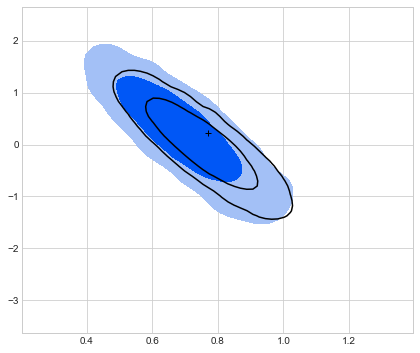

In [20]:
contour_plot.contour(sampler_Exy.chain[:,:,:].reshape([50*2000,2]), [0,1], smooth=2e5)
contour_plot.contour(sampler_Ey.chain[:,:,:].reshape([50*2000,2]), [0,1], smooth=2e5,line=True, col='k')
plt.plot(m,p,'+k')